In [1]:
# Import libraries for plotting and data manipulation
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Import the data
data_strike90_monpoints_250 = pd.read_csv('monitoring_points_strike90_monpoints250.csv')
data_strike90_monpoints_1000 = pd.read_csv('monitoring_points_strike90_monpoints1000.csv')
data_strike110_monpoints_250 = pd.read_csv('monitoring_points_strike110_monpoints250.csv')
data_strike110_monpoints_1000 = pd.read_csv('monitoring_points_strike110_monpoints1000.csv')

In [3]:
# Get the ground truth: last row of the data, the Price column
ground_truth_strike90_monpoints_250 = data_strike90_monpoints_250.iloc[-1].Price
ground_truth_strike90_monpoints_1000 = data_strike90_monpoints_1000.iloc[-1].Price
ground_truth_strike110_monpoints_250 = data_strike110_monpoints_250.iloc[-1].Price
ground_truth_strike110_monpoints_1000 = data_strike110_monpoints_1000.iloc[-1].Price


# Print the ground truth
print('Ground truth for strike 90, 250 monitoring points: ', ground_truth_strike90_monpoints_250)
print('Ground truth for strike 90, 1000 monitoring points: ', ground_truth_strike90_monpoints_1000)
print('Ground truth for strike 110, 250 monitoring points: ', ground_truth_strike110_monpoints_250)
print('Ground truth for strike 110, 1000 monitoring points: ', ground_truth_strike110_monpoints_1000)

Ground truth for strike 90, 250 monitoring points:  11.711680724544932
Ground truth for strike 90, 1000 monitoring points:  11.718894176882596
Ground truth for strike 110, 250 monitoring points:  1.3050711053274346
Ground truth for strike 110, 1000 monitoring points:  1.3128017142129558


In [4]:
# First, split the data frame into MC and FFT data
# MC data is the one where the first column Shift has the value 'MC' instead of number

# Strike 90, 250 monitoring points
data_strike90_monpoints_250_MC = data_strike90_monpoints_250[data_strike90_monpoints_250.Shift == 'MC']
data_strike90_monpoints_250_FFT = data_strike90_monpoints_250[data_strike90_monpoints_250.Shift != 'MC']

# Strike 90, 1000 monitoring points
data_strike90_monpoints_1000_MC = data_strike90_monpoints_1000[data_strike90_monpoints_1000.Shift == 'MC']
data_strike90_monpoints_1000_FFT = data_strike90_monpoints_1000[data_strike90_monpoints_1000.Shift != 'MC']

# Strike 110, 250 monitoring points
data_strike110_monpoints_250_MC = data_strike110_monpoints_250[data_strike110_monpoints_250.Shift == 'MC']
data_strike110_monpoints_250_FFT = data_strike110_monpoints_250[data_strike110_monpoints_250.Shift != 'MC']

# Strike 110, 1000 monitoring points
data_strike110_monpoints_1000_MC = data_strike110_monpoints_1000[data_strike110_monpoints_1000.Shift == 'MC']
data_strike110_monpoints_1000_FFT = data_strike110_monpoints_1000[data_strike110_monpoints_1000.Shift != 'MC']

# Reset FFT data index
data_strike90_monpoints_250_FFT = data_strike90_monpoints_250_FFT.reset_index(drop=True)
data_strike90_monpoints_1000_FFT = data_strike90_monpoints_1000_FFT.reset_index(drop=True)
data_strike110_monpoints_250_FFT = data_strike110_monpoints_250_FFT.reset_index(drop=True)
data_strike110_monpoints_1000_FFT = data_strike110_monpoints_1000_FFT.reset_index(drop=True)


In [5]:
# Examine a FFT data frame
print(data_strike90_monpoints_250_FFT)

   Shift  Monitoring Points      Price   CPU_Time
0     10               1024  11.719032   0.000641
1     11               2048  11.713320   0.000333
2     12               4096  11.712130   0.000431
3     13               8192  11.711779   0.000687
4     14              16384  11.711710   0.001541
5     15              32768  11.711685   0.002890
6     16              65536  11.711682   0.006862
7     17             131072  11.711681   0.012184
8     18             262144  11.711681   0.027282
9     19             524288  11.711681   0.058029
10    20            1048576  11.711681   0.103021
11    21            2097152  11.711681   0.236371
12    22            4194304  11.711681   0.490151
13    23            8388608  11.711681   1.011824
14    24           16777216  11.711681   2.086479
15    25           33554432  11.711681   4.226760
16    26           67108864  11.711681  10.947866
17    27          134217728  11.711681  27.103454


In [6]:
# Add a column with the absolute difference between the Price and the ground truth
data_strike90_monpoints_250_FFT.loc[:, 'AbsDiff'] = abs(data_strike90_monpoints_250_FFT.Price - ground_truth_strike90_monpoints_250)
data_strike110_monpoints_250_FFT.loc[:, 'AbsDiff'] = abs(data_strike110_monpoints_250_FFT.Price - ground_truth_strike110_monpoints_250)
data_strike90_monpoints_1000_FFT.loc[:, 'AbsDiff'] = abs(data_strike90_monpoints_1000_FFT.Price - ground_truth_strike90_monpoints_1000)
data_strike110_monpoints_1000_FFT.loc[:, 'AbsDiff'] = abs(data_strike110_monpoints_1000_FFT.Price - ground_truth_strike110_monpoints_1000)

# Examine the FFT data frame with the new column
print(data_strike90_monpoints_1000_FFT)

   Shift  Monitoring Points      Price   CPU_Time       AbsDiff
0     10               1024  11.726253   0.028174  7.359260e-03
1     11               2048  11.720536   0.000989  1.641924e-03
2     12               4096  11.719344   0.004747  4.497266e-04
3     13               8192  11.718993   0.004682  9.889532e-05
4     14              16384  11.718924   0.002203  2.957027e-05
5     15              32768  11.718898   0.003861  4.063191e-06
6     16              65536  11.718896   0.029756  1.648261e-06
7     17             131072  11.718895   0.027806  4.357352e-07
8     18             262144  11.718894   0.101598  9.594895e-08
9     19             524288  11.718894   0.111446  2.908298e-08
10    20            1048576  11.718894   0.134923  3.357046e-09
11    21            2097152  11.718894   0.252084  1.426438e-09
12    22            4194304  11.718894   0.890865  4.610019e-10
13    23            8388608  11.718894   1.233558  1.917932e-11
14    24           16777216  11.718894  

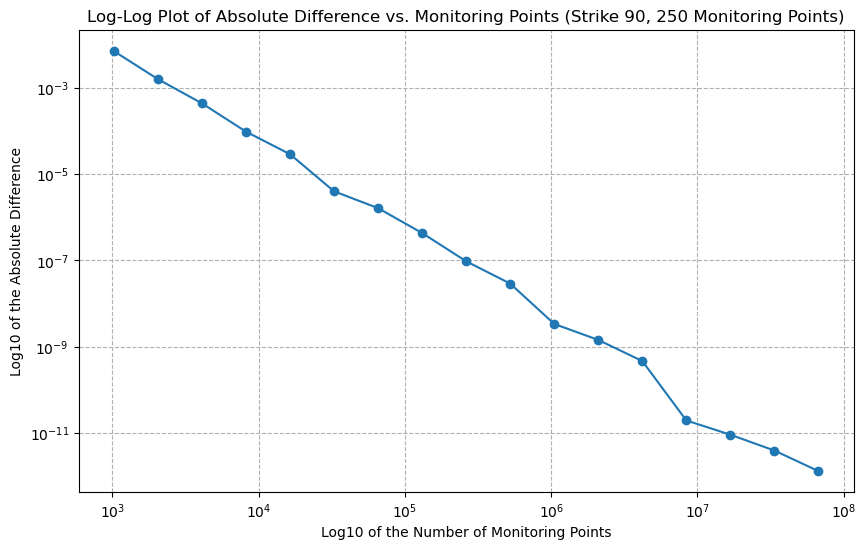

In [27]:
# Start plotting the data
# X-axis: log of the number of monitoring points, which is value in the Shift column
# Y-axis: log of the absolute difference between the Price and the ground truth, like -3 or -10

# Strike 90, 250 monitoring points

x_values_90_250 = data_strike90_monpoints_250_FFT['Monitoring Points'][:-1]
y_values_90_250 = data_strike90_monpoints_250_FFT['AbsDiff'][:-1]

# Plotting with the corrected data
plt.figure(figsize=(10, 6))
plt.plot(x_values_90_250, y_values_90_250, marker='o', linestyle='-')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Log10 of the Number of Monitoring Points')
plt.ylabel('Log10 of the Absolute Difference')
plt.title('Log-Log Plot of Absolute Difference vs. Monitoring Points (Strike 90, 250 Monitoring Points)')
plt.grid(True, which="major", ls="--")
plt.minorticks_off()

plt.show()

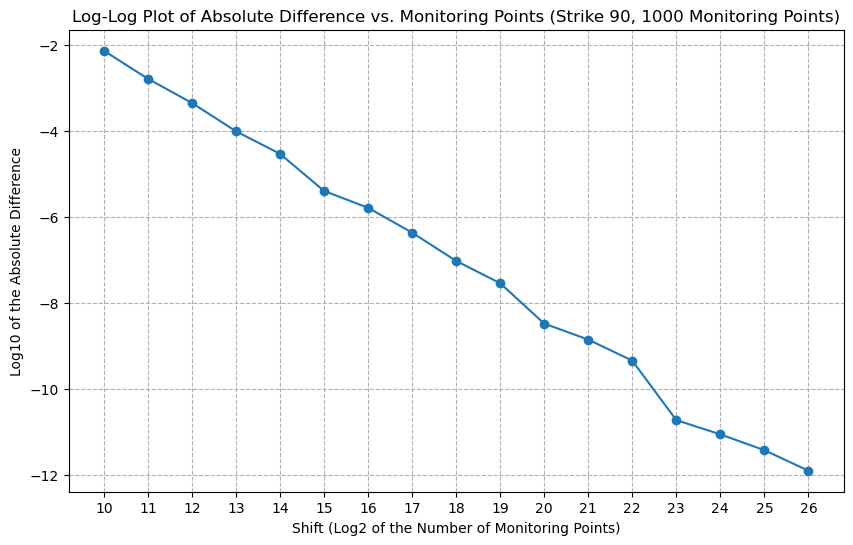

In [8]:
# Strike 90, 1000 monitoring points
# Convert AbsDiff to a numpy array for manipulation
abs_diff_array = np.array(data_strike90_monpoints_1000_FFT["AbsDiff"])

# Replace 0 with nan to avoid log(0) issues
abs_diff_array_replaced = np.where(abs_diff_array == 0, np.nan, abs_diff_array)

# Calculate log10 of the replaced AbsDiff values
y_values_corrected = np.log10(abs_diff_array_replaced)

# Plotting with the corrected data
plt.figure(figsize=(10, 6))
plt.plot(data_strike90_monpoints_1000_FFT["Shift"], y_values_corrected, marker='o', linestyle='-')
plt.xlabel('Shift (Log2 of the Number of Monitoring Points)')
plt.ylabel('Log10 of the Absolute Difference')
plt.title('Log-Log Plot of Absolute Difference vs. Monitoring Points (Strike 90, 1000 Monitoring Points)')
plt.grid(True, which="both", ls="--")

plt.show()

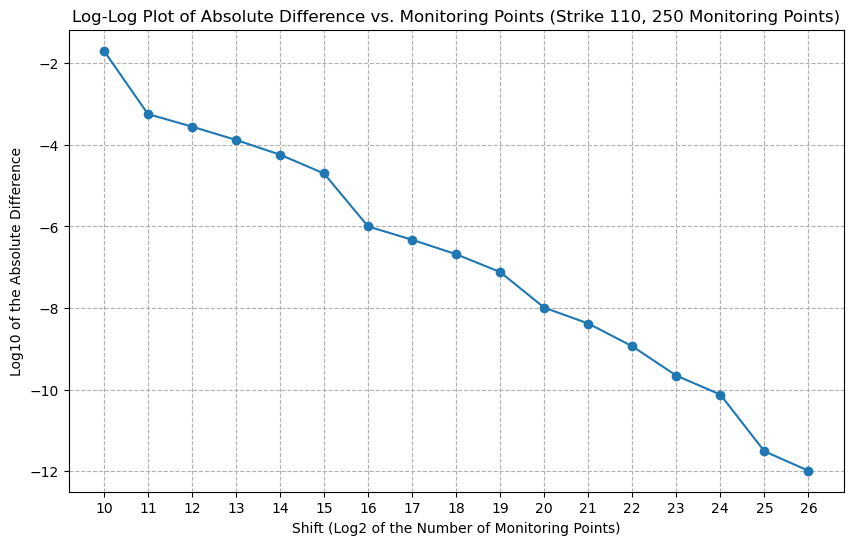

In [9]:
# Strike 110, 250 monitoring points
# Convert AbsDiff to a numpy array for manipulation
abs_diff_array = np.array(data_strike110_monpoints_250_FFT["AbsDiff"])

# Replace 0 with nan to avoid log(0) issues
abs_diff_array_replaced = np.where(abs_diff_array == 0, np.nan, abs_diff_array)

# Calculate log10 of the replaced AbsDiff values
y_values_corrected = np.log10(abs_diff_array_replaced)

# Plotting with the corrected data
plt.figure(figsize=(10, 6))
plt.plot(data_strike110_monpoints_250_FFT["Shift"], y_values_corrected, marker='o', linestyle='-')
plt.xlabel('Shift (Log2 of the Number of Monitoring Points)')
plt.ylabel('Log10 of the Absolute Difference')
plt.title('Log-Log Plot of Absolute Difference vs. Monitoring Points (Strike 110, 250 Monitoring Points)')
plt.grid(True, which="both", ls="--")


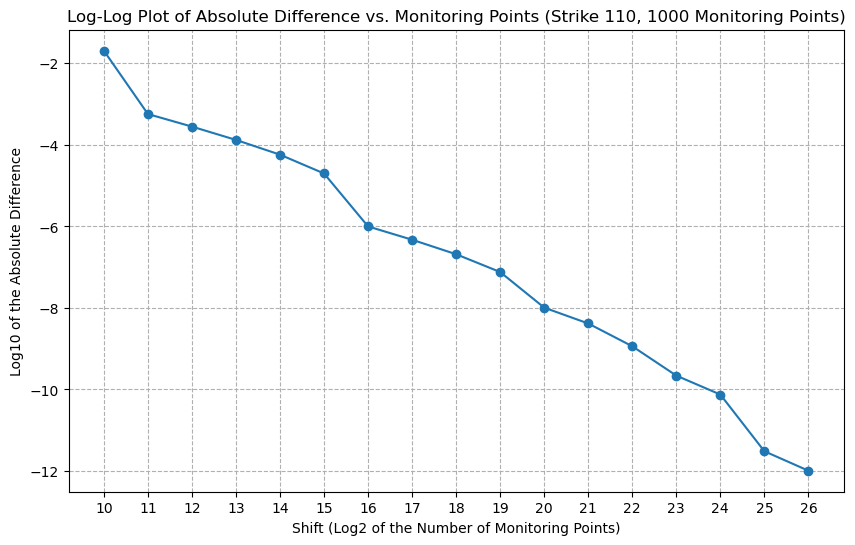

In [10]:
# Strike 110, 1000 monitoring points
abs_diff_array = np.array(data_strike110_monpoints_1000_FFT["AbsDiff"])

# Replace 0 with nan to avoid log(0) issues
abs_diff_array_replaced = np.where(abs_diff_array == 0, np.nan, abs_diff_array)

# Calculate log10 of the replaced AbsDiff values
y_values_corrected = np.log10(abs_diff_array_replaced)

# Plotting with the corrected data
plt.figure(figsize=(10, 6))
plt.plot(data_strike110_monpoints_1000_FFT["Shift"], y_values_corrected, marker='o', linestyle='-')
plt.xlabel('Shift (Log2 of the Number of Monitoring Points)')
plt.ylabel('Log10 of the Absolute Difference')
plt.title('Log-Log Plot of Absolute Difference vs. Monitoring Points (Strike 110, 1000 Monitoring Points)')
plt.grid(True, which="both", ls="--")

plt.show()

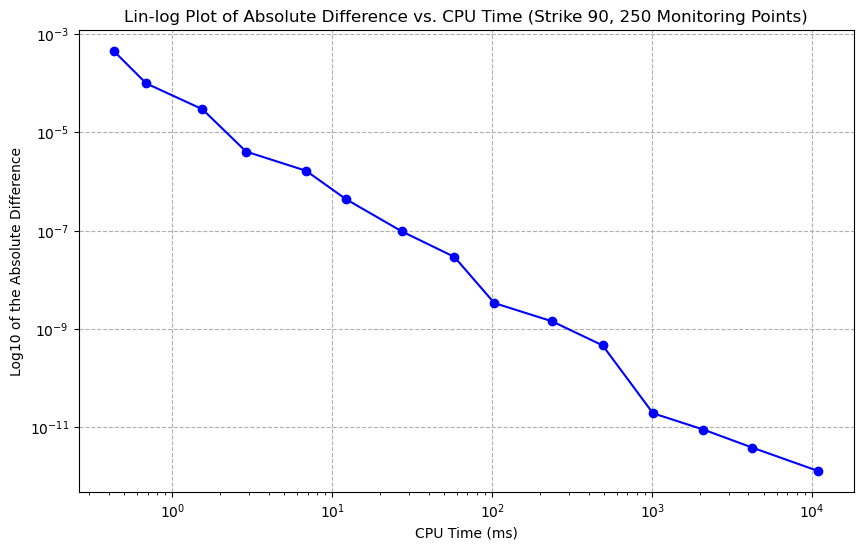

In [33]:
# Plot log of thr abs diff error vs milleseconds of CPU time
# Strike 90, 250 monitoring points

# First, times CPU time by 1000 to get milliseconds, to an array called cpu_time_ms
cpu_time_ms = np.array(data_strike90_monpoints_250_FFT["CPU_Time"] * 1000)[2:-1]

# y scale
abs_diff_array = np.array(data_strike90_monpoints_250_FFT["AbsDiff"])[2:-1]

# # Convert AbsDiff to a numpy array for manipulation
# abs_diff_array = np.array(data_strike90_monpoints_250_FFT["AbsDiff"])

# # Replace 0 with nan to avoid log(0) issues
# abs_diff_array_replaced = np.where(abs_diff_array == 0, np.nan, abs_diff_array)

# # Calculate log10 of the replaced AbsDiff values
# y_values_corrected = np.log10(abs_diff_array_replaced)

# Plotting with the corrected data
plt.figure(figsize=(10, 6))
plt.plot(cpu_time_ms, abs_diff_array, marker='o', linestyle='-', color='blue')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('CPU Time (ms)')
plt.ylabel('Log10 of the Absolute Difference')
plt.title('Lin-log Plot of Absolute Difference vs. CPU Time (Strike 90, 250 Monitoring Points)')
plt.grid(True, which="major", ls="--")

plt.show()

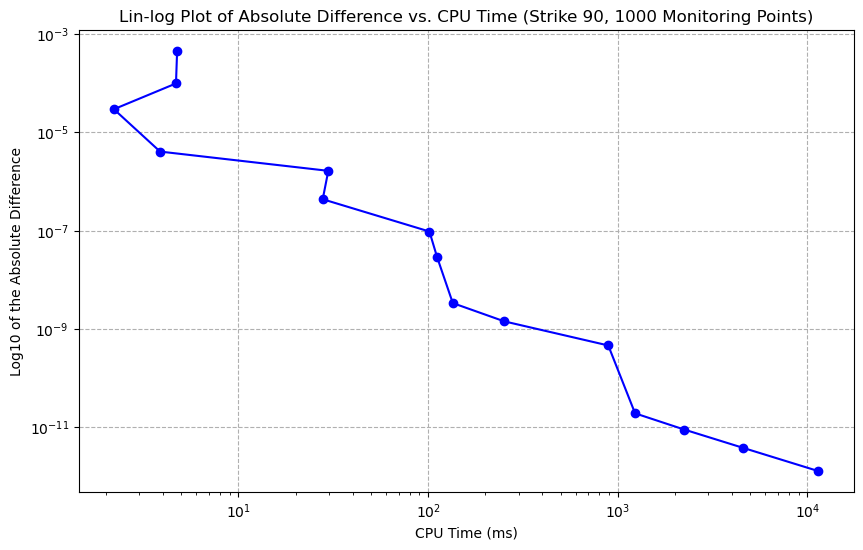

In [34]:
# Strike 90, 1000 monitoring points
# First, times CPU time by 1000 to get milliseconds, to an array called cpu_time_ms
cpu_time_ms = np.array(data_strike90_monpoints_1000_FFT["CPU_Time"] * 1000)[2:-1]

# y scale
abs_diff_array = np.array(data_strike90_monpoints_1000_FFT["AbsDiff"])[2:-1]


# # Convert AbsDiff to a numpy array for manipulation
# abs_diff_array = np.array(data_strike90_monpoints_1000_FFT["AbsDiff"])

# # Replace 0 with nan to avoid log(0) issues
# abs_diff_array_replaced = np.where(abs_diff_array == 0, np.nan, abs_diff_array)

# # Calculate log10 of the replaced AbsDiff values
# y_values_corrected = np.log10(abs_diff_array_replaced)

# Plotting with the corrected data
plt.figure(figsize=(10, 6))
plt.plot(cpu_time_ms, abs_diff_array, marker='o', linestyle='-', color='blue')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('CPU Time (ms)')
plt.ylabel('Log10 of the Absolute Difference')
plt.title('Lin-log Plot of Absolute Difference vs. CPU Time (Strike 90, 1000 Monitoring Points)')
plt.grid(True, which="major", ls="--")

plt.show()

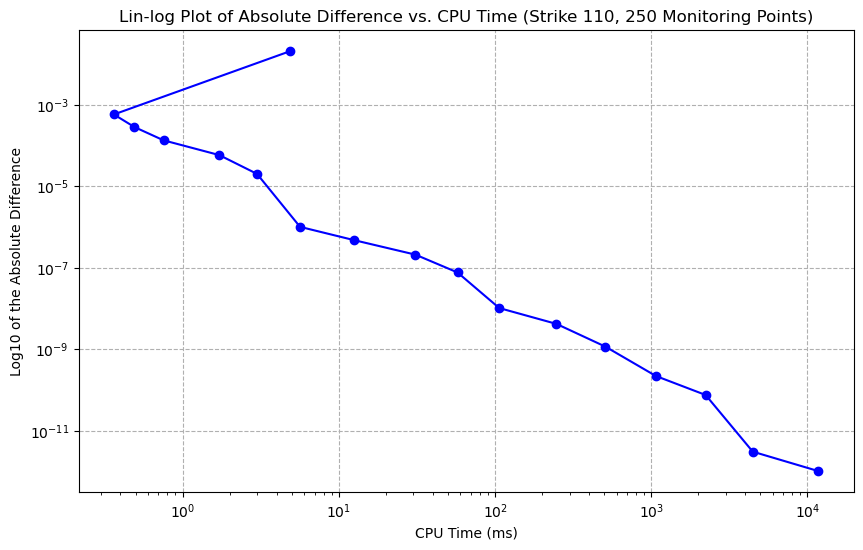

In [32]:
# Strike 110, 250 monitoring points
# First, times CPU time by 1000 to get milliseconds, to an array called cpu_time_ms
cpu_time_ms = np.array(data_strike110_monpoints_250_FFT["CPU_Time"] * 1000)[:-1]

# y scale
abs_diff_array = np.array(data_strike110_monpoints_250_FFT["AbsDiff"])[:-1]

# # Convert AbsDiff to a numpy array for manipulation
# abs_diff_array = np.array(data_strike110_monpoints_250_FFT["AbsDiff"])

# # Replace 0 with nan to avoid log(0) issues
# abs_diff_array_replaced = np.where(abs_diff_array == 0, np.nan, abs_diff_array)

# # Calculate log10 of the replaced AbsDiff values
# y_values_corrected = np.log10(abs_diff_array_replaced)

# Plotting with the corrected data
plt.figure(figsize=(10, 6))
plt.plot(cpu_time_ms, abs_diff_array, marker='o', linestyle='-', color='blue')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('CPU Time (ms)')
plt.ylabel('Log10 of the Absolute Difference')
plt.title('Lin-log Plot of Absolute Difference vs. CPU Time (Strike 110, 250 Monitoring Points)')
plt.grid(True, which="major", ls="--")

plt.show()

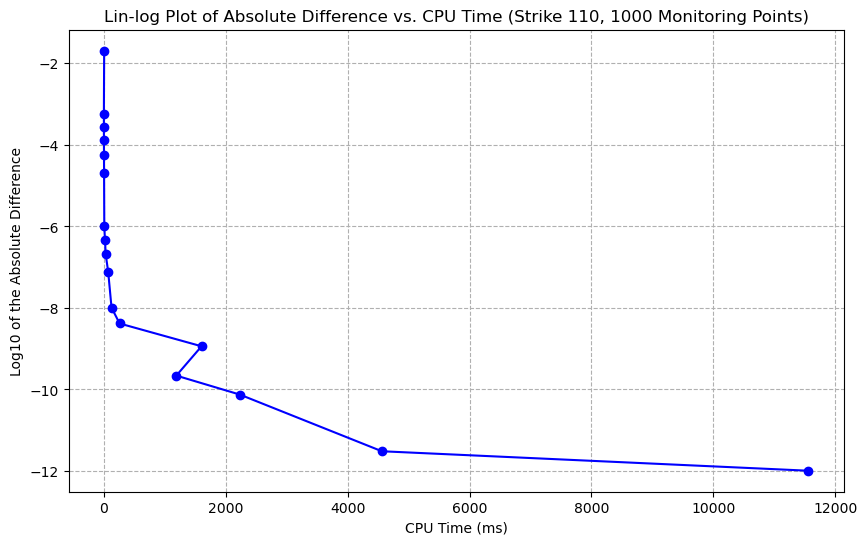

In [14]:
# Strike 110, 1000 monitoring points
# First, times CPU time by 1000 to get milliseconds, to an array called cpu_time_ms
cpu_time_ms = np.array(data_strike110_monpoints_1000_FFT["CPU_Time"] * 1000)

# Convert AbsDiff to a numpy array for manipulation
abs_diff_array = np.array(data_strike110_monpoints_1000_FFT["AbsDiff"])

# Replace 0 with nan to avoid log(0) issues
abs_diff_array_replaced = np.where(abs_diff_array == 0, np.nan, abs_diff_array)

# Calculate log10 of the replaced AbsDiff values
y_values_corrected = np.log10(abs_diff_array_replaced)

# Plotting with the corrected data
plt.figure(figsize=(10, 6))
plt.plot(cpu_time_ms, y_values_corrected, marker='o', linestyle='-', color='blue')
plt.xlabel('CPU Time (ms)')
plt.ylabel('Log10 of the Absolute Difference')
plt.title('Lin-log Plot of Absolute Difference vs. CPU Time (Strike 110, 1000 Monitoring Points)')
plt.grid(True, which="both", ls="--")

plt.show()